In [3]:
!pip install -q tensorflow
!pip install -q keras


## Imports libs
import os
from tensorflow import keras

In [4]:
 !pip install -q tensorflow-model-optimization

In [5]:
import tempfile
import os

import tensorflow as tf

from tensorflow import keras

In [6]:
import tensorflow as tf
import numpy as np
import tensorflow_model_optimization as tfmot

import tempfile

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 20s 2us/step


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [9]:
predictions = model(x_train[:10]).numpy()
predictions

array([[-0.43116766,  0.5402535 ,  0.26441848, -0.4140973 ,  1.0823874 ,
        -0.45243567,  0.03512071, -0.4403268 ,  0.04705022, -0.6849816 ],
       [ 0.22195515, -0.04587393, -0.20216313,  0.14818212,  0.60397184,
        -0.08518319,  0.12413112, -0.1952838 , -0.04832411, -0.7816735 ],
       [-0.1542314 , -0.11559113,  0.37524018, -0.32541758,  0.7883997 ,
        -0.12234486, -0.15441649,  0.21845536, -0.3125838 , -0.29370585],
       [-0.11225729, -0.01885283,  0.340935  , -0.48047185,  1.0820787 ,
        -0.32883644, -0.13865918, -0.29841262,  0.612512  , -0.57825315],
       [ 0.1487271 , -0.44147128, -0.28964263, -0.485534  ,  1.0199002 ,
         0.05450195, -0.43723258, -0.13251638,  0.34853297, -0.38052154],
       [-0.43370423,  0.01121098, -0.29318357, -0.1297619 ,  0.80190986,
        -0.507075  ,  0.11461974, -0.74790245,  0.2810626 , -0.23056838],
       [-0.03923579,  0.4881413 ,  0.24682164, -0.48476818,  0.4794929 ,
        -0.19003911,  0.15913063, -0.11855963

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.05827646, 0.15394868, 0.11683753, 0.0592798 , 0.26474133,
        0.05705012, 0.09289655, 0.05774514, 0.0940114 , 0.04521298],
       [0.12129389, 0.0927945 , 0.07936823, 0.11266777, 0.17772423,
        0.08921757, 0.10999033, 0.07991611, 0.09256741, 0.0444599 ],
       [0.08094525, 0.08413421, 0.13744783, 0.0682097 , 0.20776425,
        0.0835679 , 0.08093027, 0.11750252, 0.06909073, 0.07040741],
       [0.07712664, 0.08467779, 0.12134541, 0.05336922, 0.2546232 ,
        0.06210768, 0.075117  , 0.06402628, 0.15920906, 0.04839773],
       [0.10927706, 0.06056324, 0.07049323, 0.05795259, 0.26114076,
        0.09945063, 0.06082049, 0.08248719, 0.1334454 , 0.06436937],
       [0.06593765, 0.10288633, 0.07588585, 0.08935811, 0.22685787,
        0.06127297, 0.11409525, 0.04815916, 0.13475744, 0.08078938],
       [0.091269  , 0.1546537 , 0.12149446, 0.05845627, 0.15332195,
        0.07849289, 0.11129427, 0.08430891, 0.08718151, 0.05952713],
       [0.09619066, 0.06600358, 0.1665705

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn(y_train[:10], predictions).numpy()

2.2924235

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.3017 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1492 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.1133 - accuracy: 0.9647
Epoch 4/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.0919 - accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.0795 - accuracy: 0.9752


In [15]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0768 - accuracy: 0.9752 - 334ms/epoch - 1ms/step


[0.07683579623699188, 0.9751999974250793]

In [15]:
!pip install pydot
!pip install graphviz
!pip install visualkeras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import visualkeras
from sklearn.model_selection              import train_test_split
from sklearn.metrics                      import confusion_matrix
from tensorflow.keras.utils               import to_categorical
from tensorflow.keras.models              import Sequential
from tensorflow.keras.layers              import (Dense, Dropout, Flatten, Conv2D, MaxPool2D,
                                                  Lambda, BatchNormalization)
from tensorflow.keras.optimizers          import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks           import ReduceLROnPlateau
from tensorflow.keras.optimizers          import RMSprop, Adam, SGD
from tensorflow.keras.utils               import plot_model

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


ModuleNotFoundError: No module named 'torch'

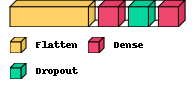

In [18]:
visualkeras.layered_view(model, legend=True)

Epoch 1/50
844/844 [==============================] - 8s 9ms/step - loss: 0.3583 - accuracy: 0.8958 - val_loss: 0.1521 - val_accuracy: 0.9578
Epoch 2/50
844/844 [==============================] - 6s 7ms/step - loss: 0.1777 - accuracy: 0.9488 - val_loss: 0.1074 - val_accuracy: 0.9693
Epoch 3/50
844/844 [==============================] - 8s 10ms/step - loss: 0.1319 - accuracy: 0.9612 - val_loss: 0.0881 - val_accuracy: 0.9748
Epoch 4/50
844/844 [==============================] - 8s 10ms/step - loss: 0.1066 - accuracy: 0.9684 - val_loss: 0.0802 - val_accuracy: 0.9767
Epoch 5/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.0777 - val_accuracy: 0.9783
Epoch 6/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0781 - accuracy: 0.9763 - val_loss: 0.0708 - val_accuracy: 0.9792
Epoch 7/50
844/844 [==============================] - 6s 7ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoc

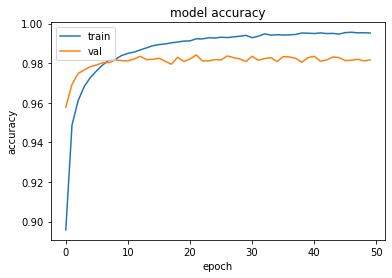

In [19]:
import keras
from matplotlib import pyplot as plt
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

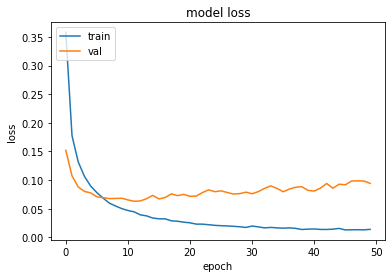

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
base_model=model

quant_aware_model = tfmot.quantization.keras.quantize_model(base_model)
quant_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten (QuantizeWrap  (None, 784)              1         
 perV2)                                                          
                                                                 
 quant_dense (QuantizeWrappe  (None, 128)              100485    
 rV2)                                                            
                                                                 
 quant_dropout (QuantizeWrap  (None, 128)              1         
 perV2)                                                          
                                                                 
 quant_dense_1 (QuantizeWrap  (None, 10)               1

In [22]:
LastValueQuantizer = tfmot.quantization.keras.quantizers.LastValueQuantizer
MovingAverageQuantizer = tfmot.quantization.keras.quantizers.MovingAverageQuantizer

class DefaultDenseQuantizeConfig(tfmot.quantization.keras.QuantizeConfig):
    # Configure how to quantize weights.
    def get_weights_and_quantizers(self, layer):
      return [(layer.kernel, LastValueQuantizer(num_bits=8, symmetric=True, narrow_range=False, per_axis=False))]

    # Configure how to quantize activations.
    def get_activations_and_quantizers(self, layer):
      return [(layer.activation, MovingAverageQuantizer(num_bits=8, symmetric=False, narrow_range=False, per_axis=False))]

    def set_quantize_weights(self, layer, quantize_weights):
      # Add this line for each item returned in `get_weights_and_quantizers`
      # , in the same order
      layer.kernel = quantize_weights[0]

    def set_quantize_activations(self, layer, quantize_activations):
      # Add this line for each item returned in `get_activations_and_quantizers`
      # , in the same order.
      layer.activation = quantize_activations[0]

    # Configure how to quantize outputs (may be equivalent to activations).
    def get_output_quantizers(self, layer):
      return []

    def get_config(self):
      return {}

In [23]:
quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer
quantize_annotate_model = tfmot.quantization.keras.quantize_annotate_model
quantize_scope = tfmot.quantization.keras.quantize_scope

class FixedRangeQuantizer(tfmot.quantization.keras.quantizers.Quantizer):
  """Quantizer which forces outputs to be between -1 and 1."""

  def build(self, tensor_shape, name, layer):
    # Not needed. No new TensorFlow variables needed.
    return {}

  def __call__(self, inputs, training, weights, **kwargs):
    return tf.keras.backend.clip(inputs, -1.0, 1.0)

  def get_config(self):
    # Not needed. No __init__ parameters to serialize.
    return {}


class ModifiedDenseQuantizeConfig(DefaultDenseQuantizeConfig):
    # Configure weights to quantize with 4-bit instead of 8-bits.
    def get_weights_and_quantizers(self, layer):
      # Use custom algorithm defined in `FixedRangeQuantizer` instead of default Quantizer.
      return [(layer.kernel, FixedRangeQuantizer())]

In [24]:
model = quantize_annotate_model(tf.keras.Sequential([
   
    keras.layers.InputLayer(input_shape=(28, 28)),
    
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    # Pass in modified `QuantizeConfig` to modify this `Dense` layer.
   quantize_annotate_layer(tf.keras.layers.Dense(129,), ModifiedDenseQuantizeConfig()),
    
]))

# `quantize_apply` requires mentioning `ModifiedDenseQuantizeConfig` with `quantize_scope`:
with quantize_scope(
  {'ModifiedDenseQuantizeConfig': ModifiedDenseQuantizeConfig}):
  # Use `quantize_apply` to actually make the model quantization aware.
  quant_aware_model = tfmot.quantization.keras.quantize_apply(model)

quant_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_1 (QuantizeL  (None, 28, 28)           3         
 ayer)                                                           
                                                                 
 quant_reshape (QuantizeWrap  (None, 28, 28, 1)        1         
 perV2)                                                          
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 12)       147       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 12)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 2028)            

In [25]:
# `quantize_model` requires a recompile.
quant_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

quant_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_1 (QuantizeL  (None, 28, 28)           3         
 ayer)                                                           
                                                                 
 quant_reshape (QuantizeWrap  (None, 28, 28, 1)        1         
 perV2)                                                          
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 12)       147       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 12)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 2028)            

In [27]:
quant_aware_model.fit(x_train, y_train,  batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 9s 6ms/step - loss: 0.4342 - accuracy: 0.8900
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1607 - accuracy: 0.9534
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1158 - accuracy: 0.9666
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0925 - accuracy: 0.9733
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0775 - accuracy: 0.9778


In [28]:
quant_aware_model.evaluate(x_test,  y_test, verbose=0)

[0.06860276311635971, 0.9789000153541565]

In [29]:
plot_model(quant_aware_model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


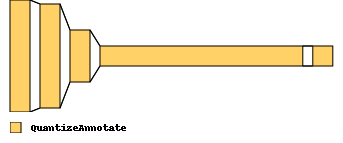

In [42]:
visualkeras.layered_view(model, legend=True, draw_volume=False)

Epoch 1/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0676 - accuracy: 0.9807 - val_loss: 0.0566 - val_accuracy: 0.9850
Epoch 2/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0603 - accuracy: 0.9827 - val_loss: 0.0513 - val_accuracy: 0.9863
Epoch 3/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0543 - accuracy: 0.9845 - val_loss: 0.0548 - val_accuracy: 0.9845
Epoch 4/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0495 - accuracy: 0.9857 - val_loss: 0.0506 - val_accuracy: 0.9873
Epoch 5/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0459 - accuracy: 0.9867 - val_loss: 0.0492 - val_accuracy: 0.9865
Epoch 6/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0424 - accuracy: 0.9876 - val_loss: 0.0509 - val_accuracy: 0.9875
Epoch 7/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 

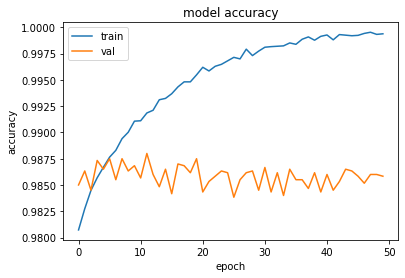

In [31]:
import keras
from matplotlib import pyplot as plt
history = quant_aware_model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=64)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

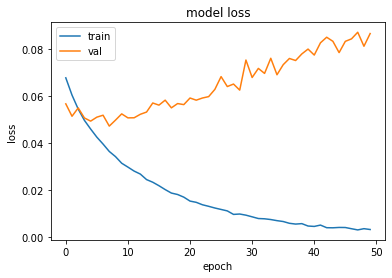

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [70]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [76]:
_, baseline_model_accuracy = base_model.evaluate(
    test_images, test_labels, verbose=0)

_, quant_aware_model_accuracy = quant_aware_model.evaluate(
   test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quantize test accuracy:', quant_aware_model_accuracy)

Baseline test accuracy: 0.9757999777793884
Quantize test accuracy: 0.9585999846458435


In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)


converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model9 = converter.convert()

INFO:tensorflow:Assets written to: C:\Windows\TEMP\tmpg36y0kn6\assets


INFO:tensorflow:Assets written to: C:\Windows\TEMP\tmpg36y0kn6\assets
C:\Users\Meskat Jahan\anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [78]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

In [79]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model9)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)
print('Quant TF test accuracy:', quant_aware_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Quant TFLite test_accuracy: 0.9579
Quant TF test accuracy: 0.9585999846458435


In [80]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model9)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)
print('Quant TF test accuracy:', quant_aware_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Quant TFLite test_accuracy: 0.9579
Quant TF test accuracy: 0.9585999846458435


In [82]:
# Create float TFLite model.
float_converter = tf.lite.TFLiteConverter.from_keras_model(base_model)
float_tflite_model10 = float_converter.convert()


# Measure sizes of models.
_, float_file = tempfile.mkstemp('.tflite')
_, quant_file = tempfile.mkstemp('.tflite')

with open(quant_file, 'wb') as f:
  f.write(quantized_tflite_model9)

with open(float_file, 'wb') as f:
  f.write(float_tflite_model10)

print("Float model in Mb:", os.path.getsize(float_file) / float(2**20))
print("Quantized model in Mb:", os.path.getsize(quant_file) / float(2**20))

INFO:tensorflow:Assets written to: C:\Windows\TEMP\tmp6v1u8vyy\assets


INFO:tensorflow:Assets written to: C:\Windows\TEMP\tmp6v1u8vyy\assets


Float model in Mb: 0.389923095703125
Quantized model in Mb: 0.25444793701171875
